# Library Imports

In [36]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Fetching Data

In [37]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
merged_df=X.copy()
merged_df["target"]=y
print(merged_df.head(5))#creation of merged data frame for easy EDA

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

# Exploratory Data Analysis

### Metadata

In [38]:
# metadata
breast_cancer_wisconsin_diagnostic.metadata

{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
  'Olvi Mangasarian',
  'Nick Street',
  'W. Street'],
 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis',
  'authors': 'W. Street, W. Wolberg, O. Mangasarian',
  'published_in': 'Electronic imaging',
  'year': 1993,
  'url': 'https:

### Variable Information

In [39]:
# variable information
breast_cancer_wisconsin_diagnostic.variables

name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        None  None   
12             radius2  Feature   Continuous        None        None  None   
13            texture2  Feature   Continuous        None        None  None   
14          perimeter2  Feature   Continuous        None        None  None   
15               area2  Feature   Continuous        None        None  None   
16         smoothness2  Feature   Continuous        None        None  None   
17        compactness2  Feature   Continuous        None        None  None   
18          concavity2  Feature   Continuous        None        None  None   
19     concave_points2  Feature   Continuous        None        None  None   
20           symmetry2  Feature   Continuous        None        None  None   
21  fractal_dimension2  Feature   Continuous        None        None  None   
22             radius3  Feature   Continuous        None        None  None   
23            texture3  Feature   Continuous        None        None  None   
24          perimeter3  Feature   Continuous        None        None  None   
25               area3  Feature   Continuous        None        None  None   
26         smoothness3  Feature   Continuous        None        None  None   
27        compactness3  Feature   Continuous        None        None  None   
28          concavity3  Feature   Continuous        None        None  None   
29     concave_points3  Feature   Continuous        None        None  None   
30           symmetry3  Feature   Continuous        None        None  None   
31  fractal_dimension3  Feature   Continuous        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
5              no  
6              no  
7              no  
8              no  
9              no  
10             no  
11             no  
12             no  
13             no  
14             no  
15             no  
16             no  
17             no  
18             no  
19             no  
20             no  
21             no  
22             no  
23             no  
24             no  
25             no  
26             no  
27             no  
28             no  
29             no  
30             no  
31             no

## Feature analysis

In [40]:
# Feature dataframe
X

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.2419             0.07871  ...   25.380   
1       0.08690          0.07017     0.1812             0.05667  ...   24.990   
2       0.19740          0.12790     0.2069             0.05999  ...   23.570   
3       0.24140          0.10520     0.2597             0.09744  ...   14.910   
4       0.19800          0.10430     0.1809             0.05883  ...   22.540   
..          ...              ...        ...                 ...  ...      ...   
564     0.24390          0.13890     0.1726             0.05623  ...   25.450   
565     0.14400          0.09791     0.1752             0.05533  ...   23.690   
566     0.09251          0.05302     0.1590             0.05648  ...   18.980   
567     0.35140          0.15200     0.2397             0.07016  ...   25.740   
568     0.00000          0.00000     0.1587             0.05884  ...    9.456   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0      0.16220       0.66560      0.7119   
1       23.41      158.80  1956.0      0.12380       0.18660      0.2416   
2       25.53      152.50  1709.0      0.14440       0.42450      0.4504   
3       26.50       98.87   567.7      0.20980       0.86630      0.6869   
4       16.67      152.20  1575.0      0.13740       0.20500      0.4000   
..        ...         ...     ...          ...           ...         ...   
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  
0             0.2654     0.4601             0.11890  
1             0.1860     0.2750             0.08902  
2             0.2430     0.3613             0.08758  
3             0.2575     0.6638             0.17300  
4             0.1625     0.2364             0.07678  
..               ...        ...                 ...  
564           0.2216     0.2060             0.07115  
565           0.1628     0.2572             0.06637  
566           0.1418     0.2218             0.07820  
567           0.2650     0.4087             0.12400  
568           0.0000     0.2871             0.07039  

[569 rows x 30 columns]

In [41]:
# Features info
# 30 Columns
# No null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [42]:
# Check for null values
for key, value in X.isnull().any().items():
    if value == True:
        print(key)
else:
    print("No Null values")

No Null values


In [43]:
# description of features
# Std for area is high
X.describe()

radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         0.020310    0.161900   
50%        0.092630    0.061540         0.033500    0.179200   
75%        0.130400    0.130700         0.074000    0.195700   
max        0.345400    0.426800         0.201200    0.304000   

       fractal_dimension1  ...     radius3    texture3  perimeter3  \
count          569.000000  ...  569.000000  569.000000  569.000000   
mean             0.062798  ...   16.269190   25.677223  107.261213   
std              0.007060  ...    4.833242    6.146258   33.602542   
min              0.049960  ...    7.930000   12.020000   50.410000   
25%              0.057700  ...   13.010000   21.080000   84.110000   
50%              0.061540  ...   14.970000   25.410000   97.660000   
75%              0.066120  ...   18.790000   29.720000  125.400000   
max              0.097440  ...   36.040000   49.540000  251.200000   

             area3  smoothness3  compactness3  concavity3  concave_points3  \
count   569.000000   569.000000    569.000000  569.000000       569.000000   
mean    880.583128     0.132369      0.254265    0.272188         0.114606   
std     569.356993     0.022832      0.157336    0.208624         0.065732   
min     185.200000     0.071170      0.027290    0.000000         0.000000   
25%     515.300000     0.116600      0.147200    0.114500         0.064930   
50%     686.500000     0.131300      0.211900    0.226700         0.099930   
75%    1084.000000     0.146000      0.339100    0.382900         0.161400   
max    4254.000000     0.222600      1.058000    1.252000         0.291000   

        symmetry3  fractal_dimension3  
count  569.000000          569.000000  
mean     0.290076            0.083946  
std      0.061867            0.018061  
min      0.156500            0.055040  
25%      0.250400            0.071460  
50%      0.282200            0.080040  
75%      0.317900            0.092080  
max      0.663800            0.207500  

[8 rows x 30 columns]

In [44]:
# Correlation Analysis
correlation_df = X.corr()


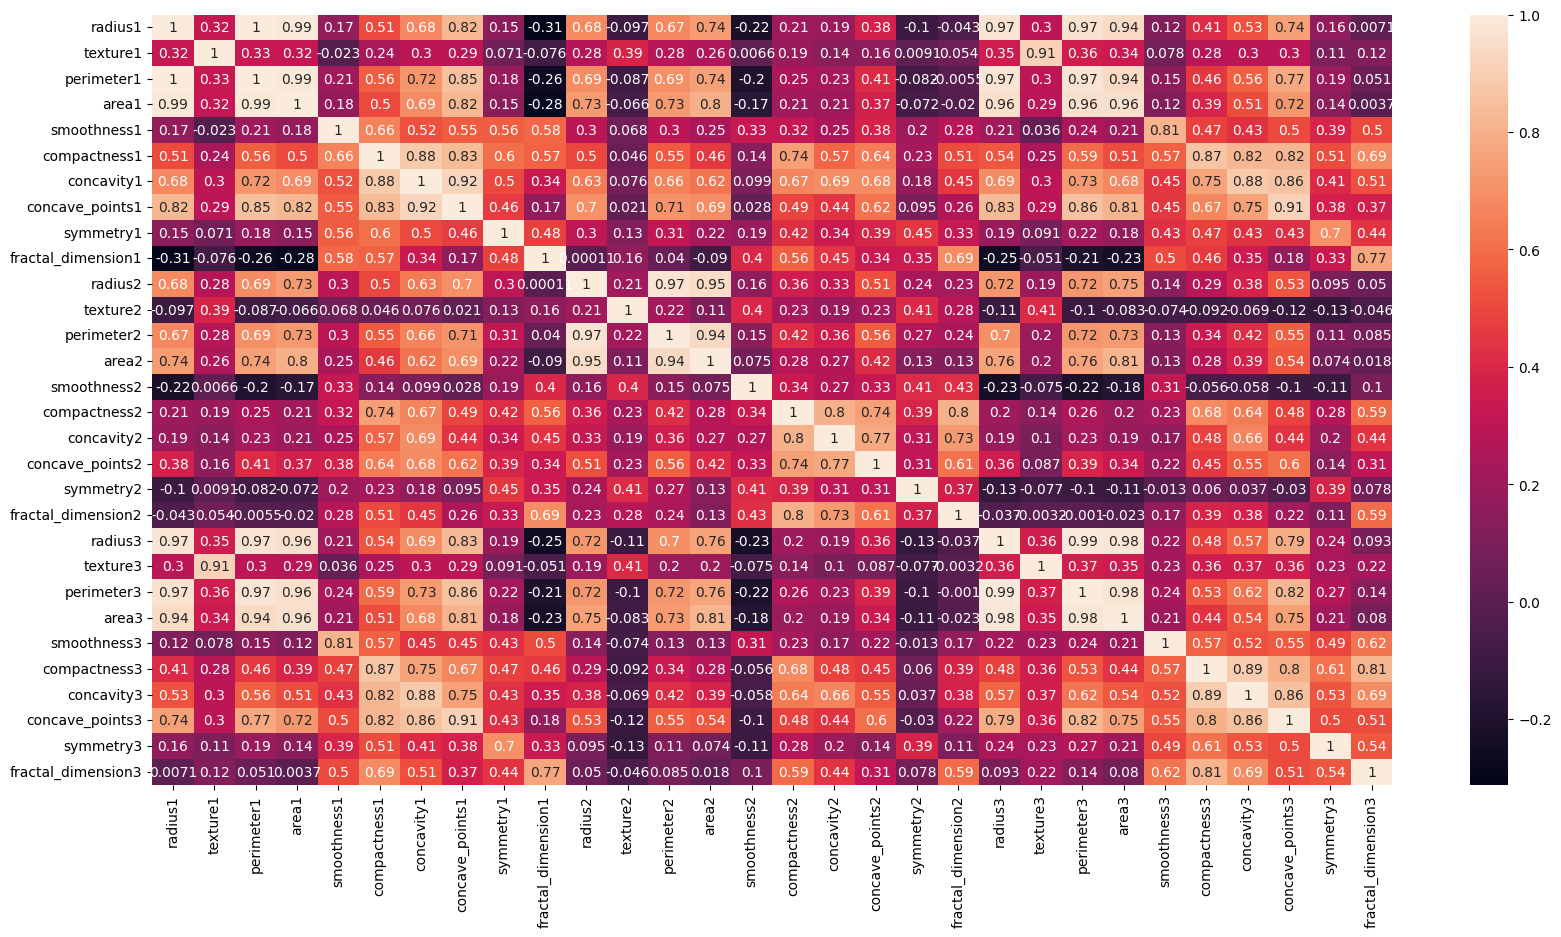

In [45]:
fig1 = plt.figure(figsize = (20,10))
sns.heatmap(correlation_df, annot=True)
plt.show()

In [46]:
X

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.2419             0.07871  ...   25.380   
1       0.08690          0.07017     0.1812             0.05667  ...   24.990   
2       0.19740          0.12790     0.2069             0.05999  ...   23.570   
3       0.24140          0.10520     0.2597             0.09744  ...   14.910   
4       0.19800          0.10430     0.1809             0.05883  ...   22.540   
..          ...              ...        ...                 ...  ...      ...   
564     0.24390          0.13890     0.1726             0.05623  ...   25.450   
565     0.14400          0.09791     0.1752             0.05533  ...   23.690   
566     0.09251          0.05302     0.1590             0.05648  ...   18.980   
567     0.35140          0.15200     0.2397             0.07016  ...   25.740   
568     0.00000          0.00000     0.1587             0.05884  ...    9.456   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0      0.16220       0.66560      0.7119   
1       23.41      158.80  1956.0      0.12380       0.18660      0.2416   
2       25.53      152.50  1709.0      0.14440       0.42450      0.4504   
3       26.50       98.87   567.7      0.20980       0.86630      0.6869   
4       16.67      152.20  1575.0      0.13740       0.20500      0.4000   
..        ...         ...     ...          ...           ...         ...   
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  
0             0.2654     0.4601             0.11890  
1             0.1860     0.2750             0.08902  
2             0.2430     0.3613             0.08758  
3             0.2575     0.6638             0.17300  
4             0.1625     0.2364             0.07678  
..               ...        ...                 ...  
564           0.2216     0.2060             0.07115  
565           0.1628     0.2572             0.06637  
566           0.1418     0.2218             0.07820  
567           0.2650     0.4087             0.12400  
568           0.0000     0.2871             0.07039  

[569 rows x 30 columns]

## 

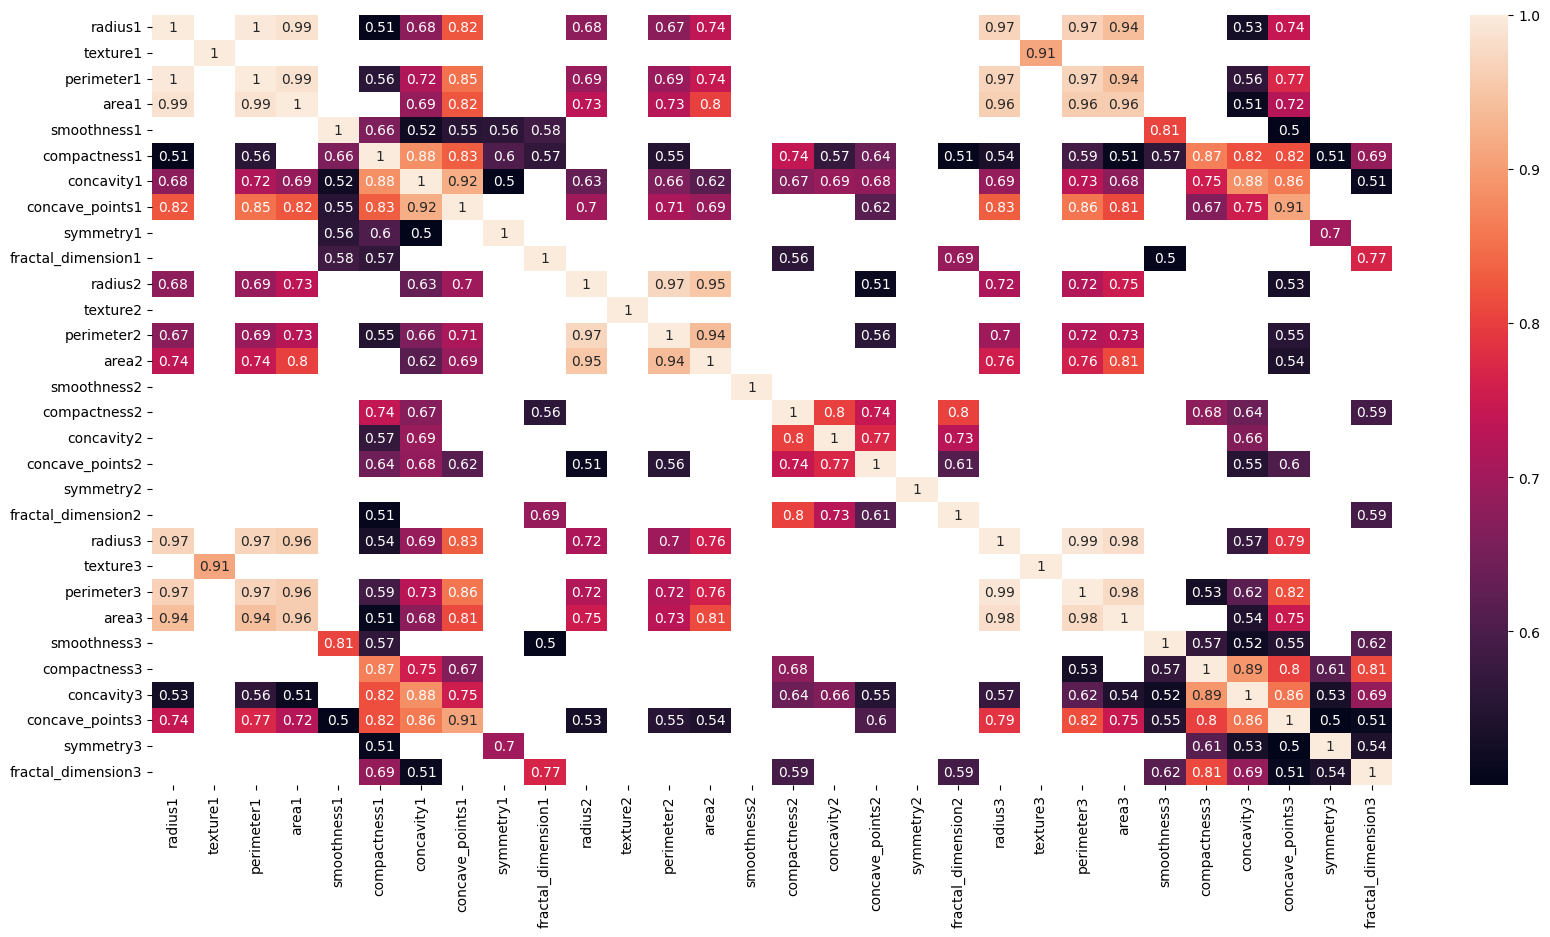

In [47]:
# Strong correlations
strong_corr = correlation_df[correlation_df > 0.5]

fig2 = plt.figure(figsize = (20,10))
sns.heatmap(strong_corr, annot=True)
plt.show()


* Looking at his heatmap, we can say many of the features have strong correlation with each other
* Some of these features are - radius with other radius, area and perimeter with their respective radius (which is to be expected), perimeter and area with other perimeters and areas (which is also to be expected as the 3 radii are in strong correlation)

* **From these correlations, we can remove some features having very strong correlations**
* Since area and perimeter are calculated from the radius, we can remove all 3 perimeter and area features

In [48]:
X_chopped = X.drop(['perimeter1', 'perimeter2', 'perimeter3', 'area1', 'area2', 'area3'], axis=1)
X_chopped

radius1  texture1  smoothness1  compactness1  concavity1  \
0      17.99     10.38      0.11840       0.27760     0.30010   
1      20.57     17.77      0.08474       0.07864     0.08690   
2      19.69     21.25      0.10960       0.15990     0.19740   
3      11.42     20.38      0.14250       0.28390     0.24140   
4      20.29     14.34      0.10030       0.13280     0.19800   
..       ...       ...          ...           ...         ...   
564    21.56     22.39      0.11100       0.11590     0.24390   
565    20.13     28.25      0.09780       0.10340     0.14400   
566    16.60     28.08      0.08455       0.10230     0.09251   
567    20.60     29.33      0.11780       0.27700     0.35140   
568     7.76     24.54      0.05263       0.04362     0.00000   

     concave_points1  symmetry1  fractal_dimension1  radius2  texture2  ...  \
0            0.14710     0.2419             0.07871   1.0950    0.9053  ...   
1            0.07017     0.1812             0.05667   0.5435    0.7339  ...   
2            0.12790     0.2069             0.05999   0.7456    0.7869  ...   
3            0.10520     0.2597             0.09744   0.4956    1.1560  ...   
4            0.10430     0.1809             0.05883   0.7572    0.7813  ...   
..               ...        ...                 ...      ...       ...  ...   
564          0.13890     0.1726             0.05623   1.1760    1.2560  ...   
565          0.09791     0.1752             0.05533   0.7655    2.4630  ...   
566          0.05302     0.1590             0.05648   0.4564    1.0750  ...   
567          0.15200     0.2397             0.07016   0.7260    1.5950  ...   
568          0.00000     0.1587             0.05884   0.3857    1.4280  ...   

     symmetry2  fractal_dimension2  radius3  texture3  smoothness3  \
0      0.03003            0.006193   25.380     17.33      0.16220   
1      0.01389            0.003532   24.990     23.41      0.12380   
2      0.02250            0.004571   23.570     25.53      0.14440   
3      0.05963            0.009208   14.910     26.50      0.20980   
4      0.01756            0.005115   22.540     16.67      0.13740   
..         ...                 ...      ...       ...          ...   
564    0.01114            0.004239   25.450     26.40      0.14100   
565    0.01898            0.002498   23.690     38.25      0.11660   
566    0.01318            0.003892   18.980     34.12      0.11390   
567    0.02324            0.006185   25.740     39.42      0.16500   
568    0.02676            0.002783    9.456     30.37      0.08996   

     compactness3  concavity3  concave_points3  symmetry3  fractal_dimension3  
0         0.66560      0.7119           0.2654     0.4601             0.11890  
1         0.18660      0.2416           0.1860     0.2750             0.08902  
2         0.42450      0.4504           0.2430     0.3613             0.08758  
3         0.86630      0.6869           0.2575     0.6638             0.17300  
4         0.20500      0.4000           0.1625     0.2364             0.07678  
..            ...         ...              ...        ...                 ...  
564       0.21130      0.4107           0.2216     0.2060             0.07115  
565       0.19220      0.3215           0.1628     0.2572             0.06637  
566       0.30940      0.3403           0.1418     0.2218             0.07820  
567       0.86810      0.9387           0.2650     0.4087             0.12400  
568       0.06444      0.0000           0.0000     0.2871             0.07039  

[569 rows x 24 columns]

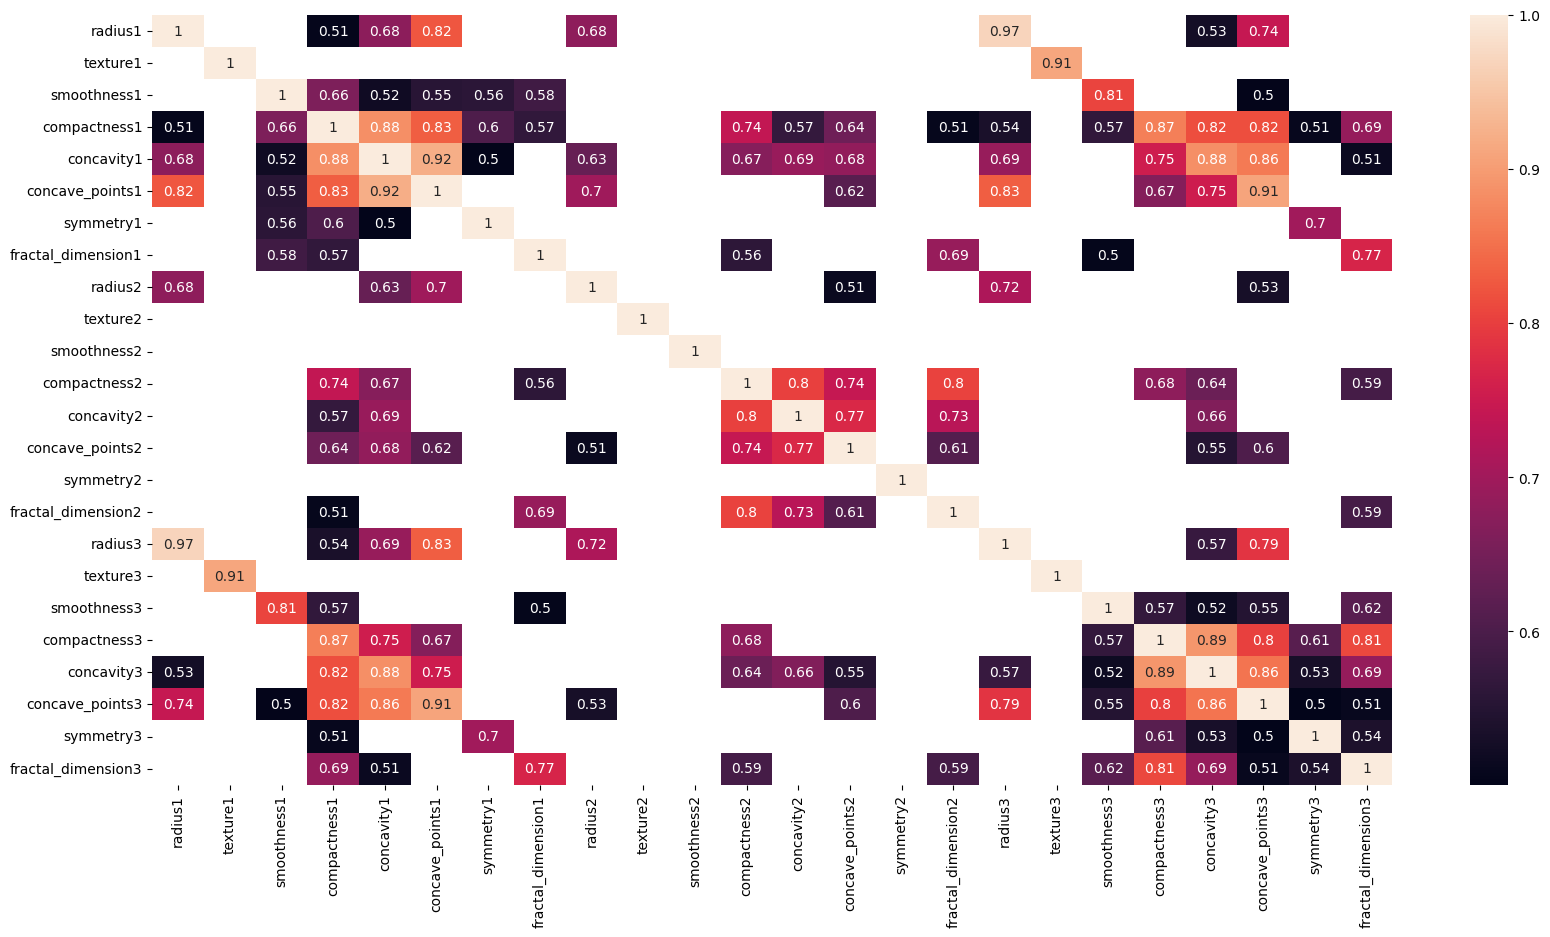

In [49]:

X_chopped_corr = X_chopped.corr()

strong_corr = X_chopped_corr[X_chopped_corr > 0.5]

fig3 = plt.figure(figsize = (20,10))
sns.heatmap(strong_corr, annot=True)
plt.show()

* We wil use this data set with features dropped randomly to compare the acuuracy of our model with the one trained on principal components of this data set. Ideally, the values should not be very far away

In [50]:
merged_df_chopped=merged_df.drop(['perimeter1', 'perimeter2', 'perimeter3', 'area1', 'area2', 'area3'], axis=1)
print(merged_df_chopped.info())
print('________')
print(merged_df_chopped.target.value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   smoothness1         569 non-null    float64
 3   compactness1        569 non-null    float64
 4   concavity1          569 non-null    float64
 5   concave_points1     569 non-null    float64
 6   symmetry1           569 non-null    float64
 7   fractal_dimension1  569 non-null    float64
 8   radius2             569 non-null    float64
 9   texture2            569 non-null    float64
 10  smoothness2         569 non-null    float64
 11  compactness2        569 non-null    float64
 12  concavity2          569 non-null    float64
 13  concave_points2     569 non-null    float64
 14  symmetry2           569 non-null    float64
 15  fractal_dimension2  569 non-null    float64
 16  radius3 

* The number of data individuals with bening tumors are greater thhan the number of individuals with malignant tumors
* More than Half the number of data points in the data set correspond to individuals with benign tumors


In [52]:
merged_df_chopped["mean_radius"]=merged_df_chopped[['radius1','radius2','radius3']].mean(axis=1)
merged_df_chopped["mean_texture"]=merged_df_chopped[['texture1','texture2','texture3']].mean(axis=1)
merged_df_chopped["mean_smoothness"]=merged_df_chopped[['smoothness1','smoothness2','smoothness3']].mean(axis=1)
merged_df_chopped["mean_compactness"]=merged_df_chopped[['compactness1','compactness2','compactness3']].mean(axis=1)
merged_df_chopped["mean_concavity"]=merged_df_chopped[['concavity1','concavity2','concavity3']].mean(axis=1)
merged_df_chopped["mean_concave_points"]=merged_df_chopped[['concave_points1','concave_points2','concave_points2']].mean(axis=1)
merged_df_chopped["mean_symmetry"]=merged_df_chopped[['symmetry1','symmetry2','symmetry3']].mean(axis=1)
merged_df_chopped["mean_fractal_dimension"]=merged_df_chopped[["fractal_dimension1","fractal_dimension2","fractal_dimension3"]].mean(axis=1)


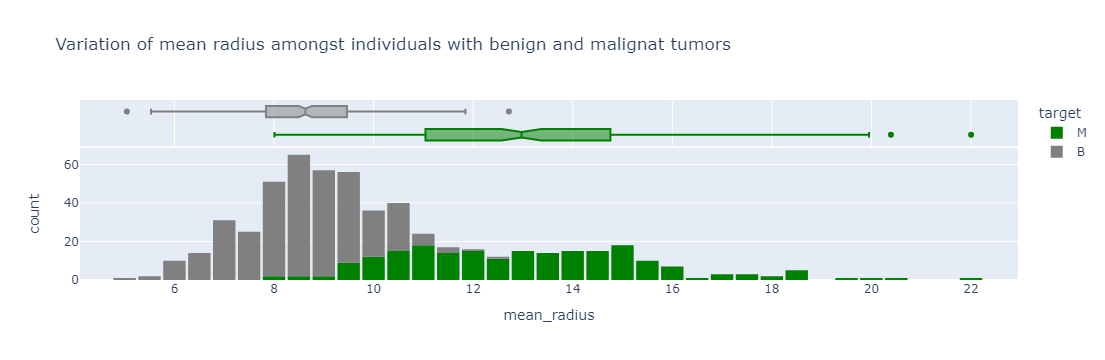

In [53]:
# import plotly.io as pio

# # Set the notebook mode
# pio.renderers.default = 'notebook_connected'

fig4= px.histogram(merged_df_chopped, 
                   x='mean_radius', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Variation of mean radius amongst individuals with benign and malignat tumors')
fig4.update_layout(bargap=0.1)
fig4.show()

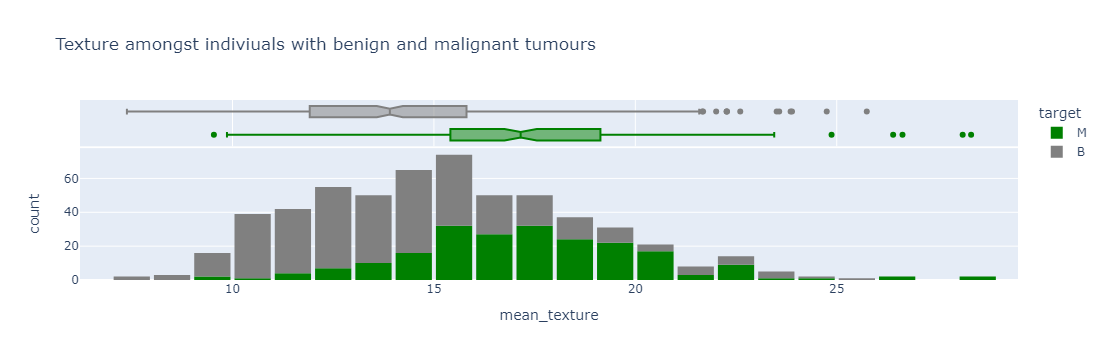

In [54]:
fig5= px.histogram(merged_df_chopped, 
                   x='mean_texture', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Texture amongst indiviuals with benign and malignant tumours')
fig5.update_layout(bargap=0.1)
fig5.show()

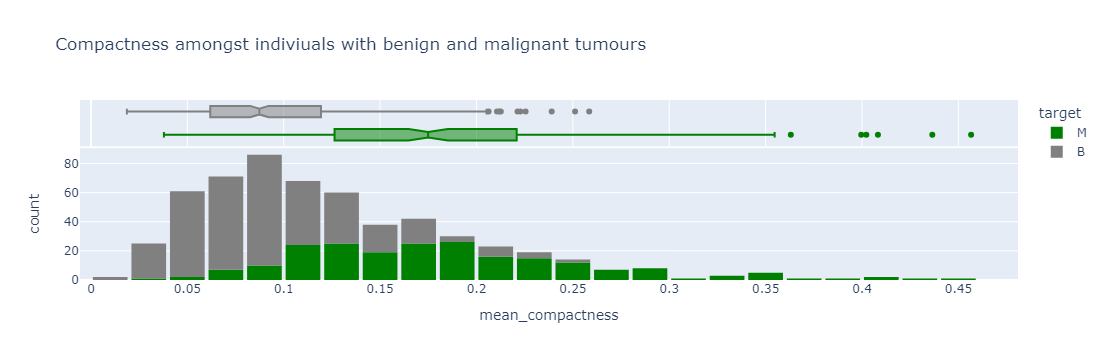

In [55]:
fig6= px.histogram(merged_df_chopped, 
                   x='mean_compactness', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Compactness amongst indiviuals with benign and malignant tumours')
fig6.update_layout(bargap=0.1)
fig6.show()

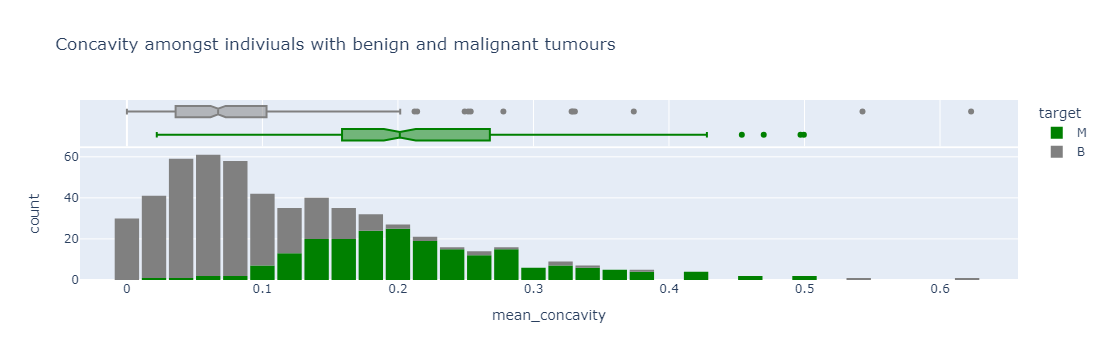

In [56]:
fig7= px.histogram(merged_df_chopped, 
                   x='mean_concavity', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Concavity amongst indiviuals with benign and malignant tumours')
fig7.update_layout(bargap=0.1)
fig7.show()

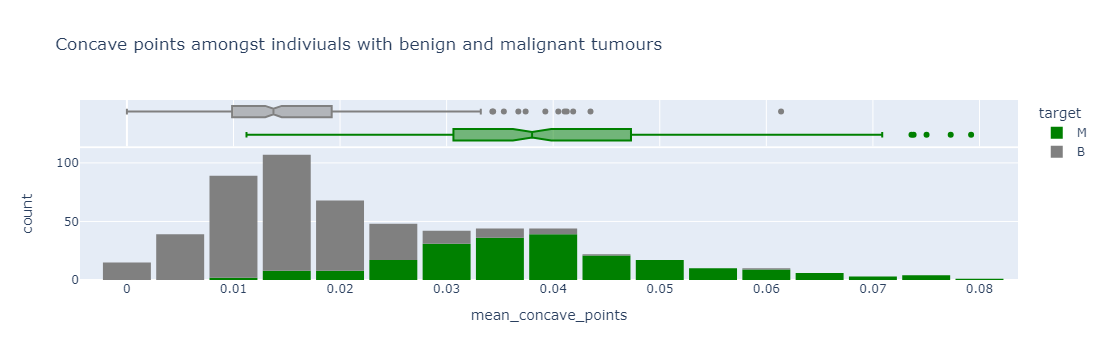

In [57]:
fig8= px.histogram(merged_df_chopped, 
                   x='mean_concave_points', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Concave points amongst indiviuals with benign and malignant tumours')
fig8.update_layout(bargap=0.1)
fig8.show()

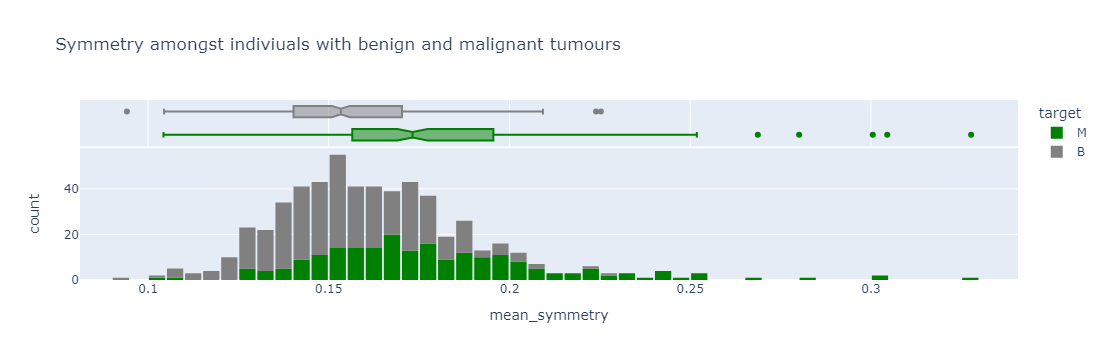

In [58]:
fig9= px.histogram(merged_df_chopped, 
                   x='mean_symmetry', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Symmetry amongst indiviuals with benign and malignant tumours')
fig9.update_layout(bargap=0.1)
fig9.show()

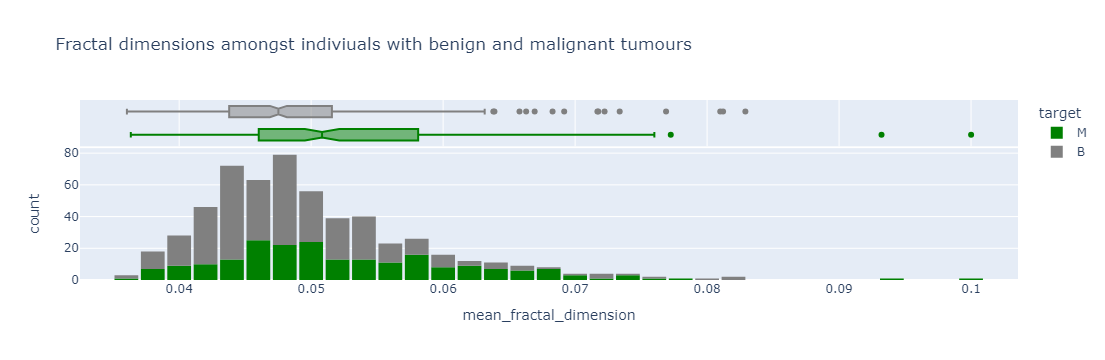

In [59]:
fig10= px.histogram(merged_df_chopped, 
                   x='mean_fractal_dimension', 
                   marginal='box', 
                   color='target', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Fractal dimensions amongst indiviuals with benign and malignant tumours')
fig10.update_layout(bargap=0.1)
fig10.show()

* Average value of all the features is greater for individuals with malignant tumors than benign tumors

# PCA for dimensionality reduction


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_PCA = pd.DataFrame(scaler.fit_transform(X))
print(X_scaled_PCA)
pca = PCA()
pca.fit(X_scaled_PCA)


           0         1         2         3         4         5         6   \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

           7         8         9   ...        20        21        22  \
0  

PCA()

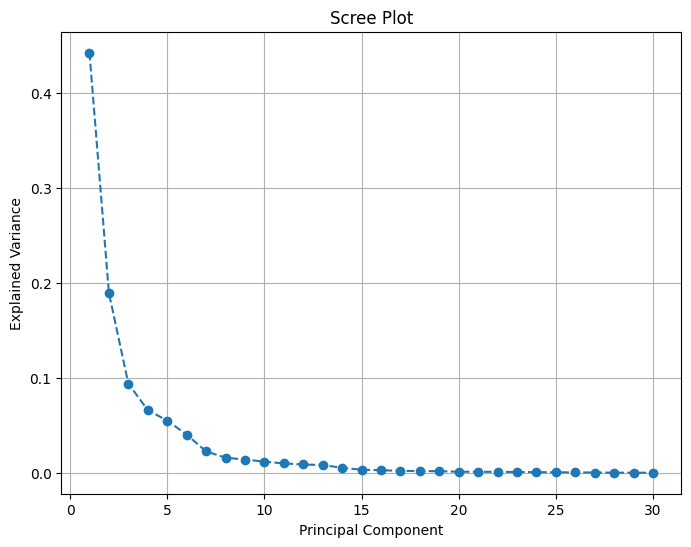

In [61]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()


* Explained Variance is explained by 15 principal components

In [62]:
pca_15=PCA(n_components=15)
z_15=pca_15.fit_transform(X_scaled_PCA)

In [64]:
column_label=["PCA" +str(i+1) for i in range(15)]
df_PCA15=pd.DataFrame(z_15,columns=column_label,index=X_scaled_PCA.index)
df_PCA15["target"]=y
print(df_PCA15)
print("_________")
w_15=pd.DataFrame(pca_15.components_,columns=X_scaled_PCA.columns,index=column_label)
print(w_15)



          PCA1       PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

         PCA8      PCA9     PCA10     PCA11     PCA

In [65]:
# dataset used for all the machine learning algorithms
print(df_PCA15.head(5))

       PCA1       PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.398407 -0.157118 -0.877402  0.262955 -0.859014  0.103388 -0.690811   
1  0.240988 -0.711905  1.106995  0.813120  0.157923 -0.943528 -0.653488   
2  0.097374  0.024066  0.454275 -0.605604  0.124387 -0.410627  0.016682   
3  1.059565 -1.405439 -1.116975 -1.151513  1.011316 -0.933270 -0.487439   
4  0.636376 -0.263805  0.377704  0.651360 -0.110515  0.387948 -0.539179   

      PCA15 target  
0 -0.601817      M  
1  0.008962      M  
2  0.483425      M  
3 -0.168

# Classification

## 1) Baseline Classification

In [66]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
#splitting data into training and test data
df_train,df_test=train_test_split(df_PCA15, test_size=0.2,random_state=123)
X_train=df_train.drop(columns=["target"])
y_train=df_train.target
X_test=df_test.drop(columns=["target"])
y_test=df_test.target

In [68]:
model_dummy=DummyClassifier(strategy="most_frequent")
model_dummy.fit(X_train,y_train)
y_pred=model_dummy.predict(X_test)
print(f"Accuracy of the baseline ddummy classifier is {accuracy_score(y_pred,y_test)}")



Accuracy of the baseline ddummy classifier is 0.6403508771929824


## 2) Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay

In [73]:
scaler=StandardScaler()
model_dt=DecisionTreeClassifier()
pipeline_dt=make_pipeline(scaler, model_dt)
param_grid_dt={
    "decisiontreeclassifier__criterion": ["gini","entropy"],
    "decisiontreeclassifier__max_depth":list(range(1,10)),
    "decisiontreeclassifier__max_leaf_nodes":list(range(5,10)),
    "decisiontreeclassifier__min_samples_split":list(range(5,10)),
    "decisiontreeclassifier__min_samples_leaf":list(range(5,10)),
}

In [74]:
gs_dt = GridSearchCV(pipeline_dt, param_grid = param_grid_dt,cv=5,n_jobs=-1,return_train_score=True) #Training the model
gs_dt.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9],
                         'decisiontreeclassifier__max_leaf_nodes': [5, 6, 7, 8,
                                                                    9],
                         'decisiontreeclassifier__min_samples_leaf': [5, 6, 7,
                                                                      8, 9],
                         'decisiontreeclassifier__min_samples_split': [5, 6, 7,
                                                                       8, 9]},
             return_train_score=True)

In [75]:
cv_results_dt_df=pd.DataFrame(gs_dt.cv_results_)# cross validation results as a data frame
print(cv_results_dt_df.describe())
#plot_tree(best_estimator_dt)

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
count    2250.000000   2250.000000      2250.000000     2250.000000   
mean        0.031740      0.006107         0.007388        0.004305   
std         0.010744      0.003809         0.003096        0.002670   
min         0.001728      0.000043         0.000000        0.000000   
25%         0.029757      0.003594         0.005763        0.002589   
50%         0.034786      0.005116         0.007416        0.003926   
75%         0.038005      0.007645         0.009069        0.005361   
max         0.066900      0.030157         0.033010        0.034738   

       split0_test_score  split1_test_score  split2_test_score  \
count        2250.000000        2250.000000        2250.000000   
mean            0.959927           0.880073           0.918667   
std             0.012292           0.012366           0.014130   
min             0.945055           0.857143           0.901099   
25%             0.945055      

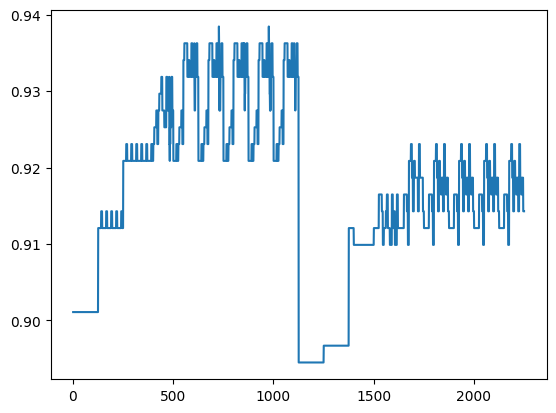

In [76]:
plt.plot(list(range(1,2251)),cv_results_dt_df["mean_test_score"]) #variation of mean test score amongst the 450 parameters


The best estimator after hyper parameter optimization is Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=9,
                                        min_samples_leaf=5,
                                        min_samples_split=7))])


[Text(0.5357142857142857, 0.9, 'x[0] <= 0.09\ngini = 0.469\nsamples = 455\nvalue = [284, 171]'),
 Text(0.21428571428571427, 0.7, 'x[0] <= -0.314\ngini = 0.13\nsamples = 286\nvalue = [266, 20]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.026\nsamples = 231\nvalue = [228, 3]'),
 Text(0.2857142857142857, 0.5, 'x[1] <= -0.543\ngini = 0.427\nsamples = 55\nvalue = [38, 17]'),
 Text(0.14285714285714285, 0.3, 'x[7] <= -0.09\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.07142857142857142, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.42857142857142855, 0.3, 'x[2] <= -1.111\ngini = 0.25\nsamples = 41\nvalue = [35, 6]'),
 Text(0.35714285714285715, 0.1, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.5, 0.1, 'gini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(0.8571428571428571, 0.7, 'x[4] <= 2.241\ngini = 0.19\nsamples = 169\nvalue = [18, 151]'),
 Text(0.7857142857142857, 0.5, 'x[0] <= 0.411\

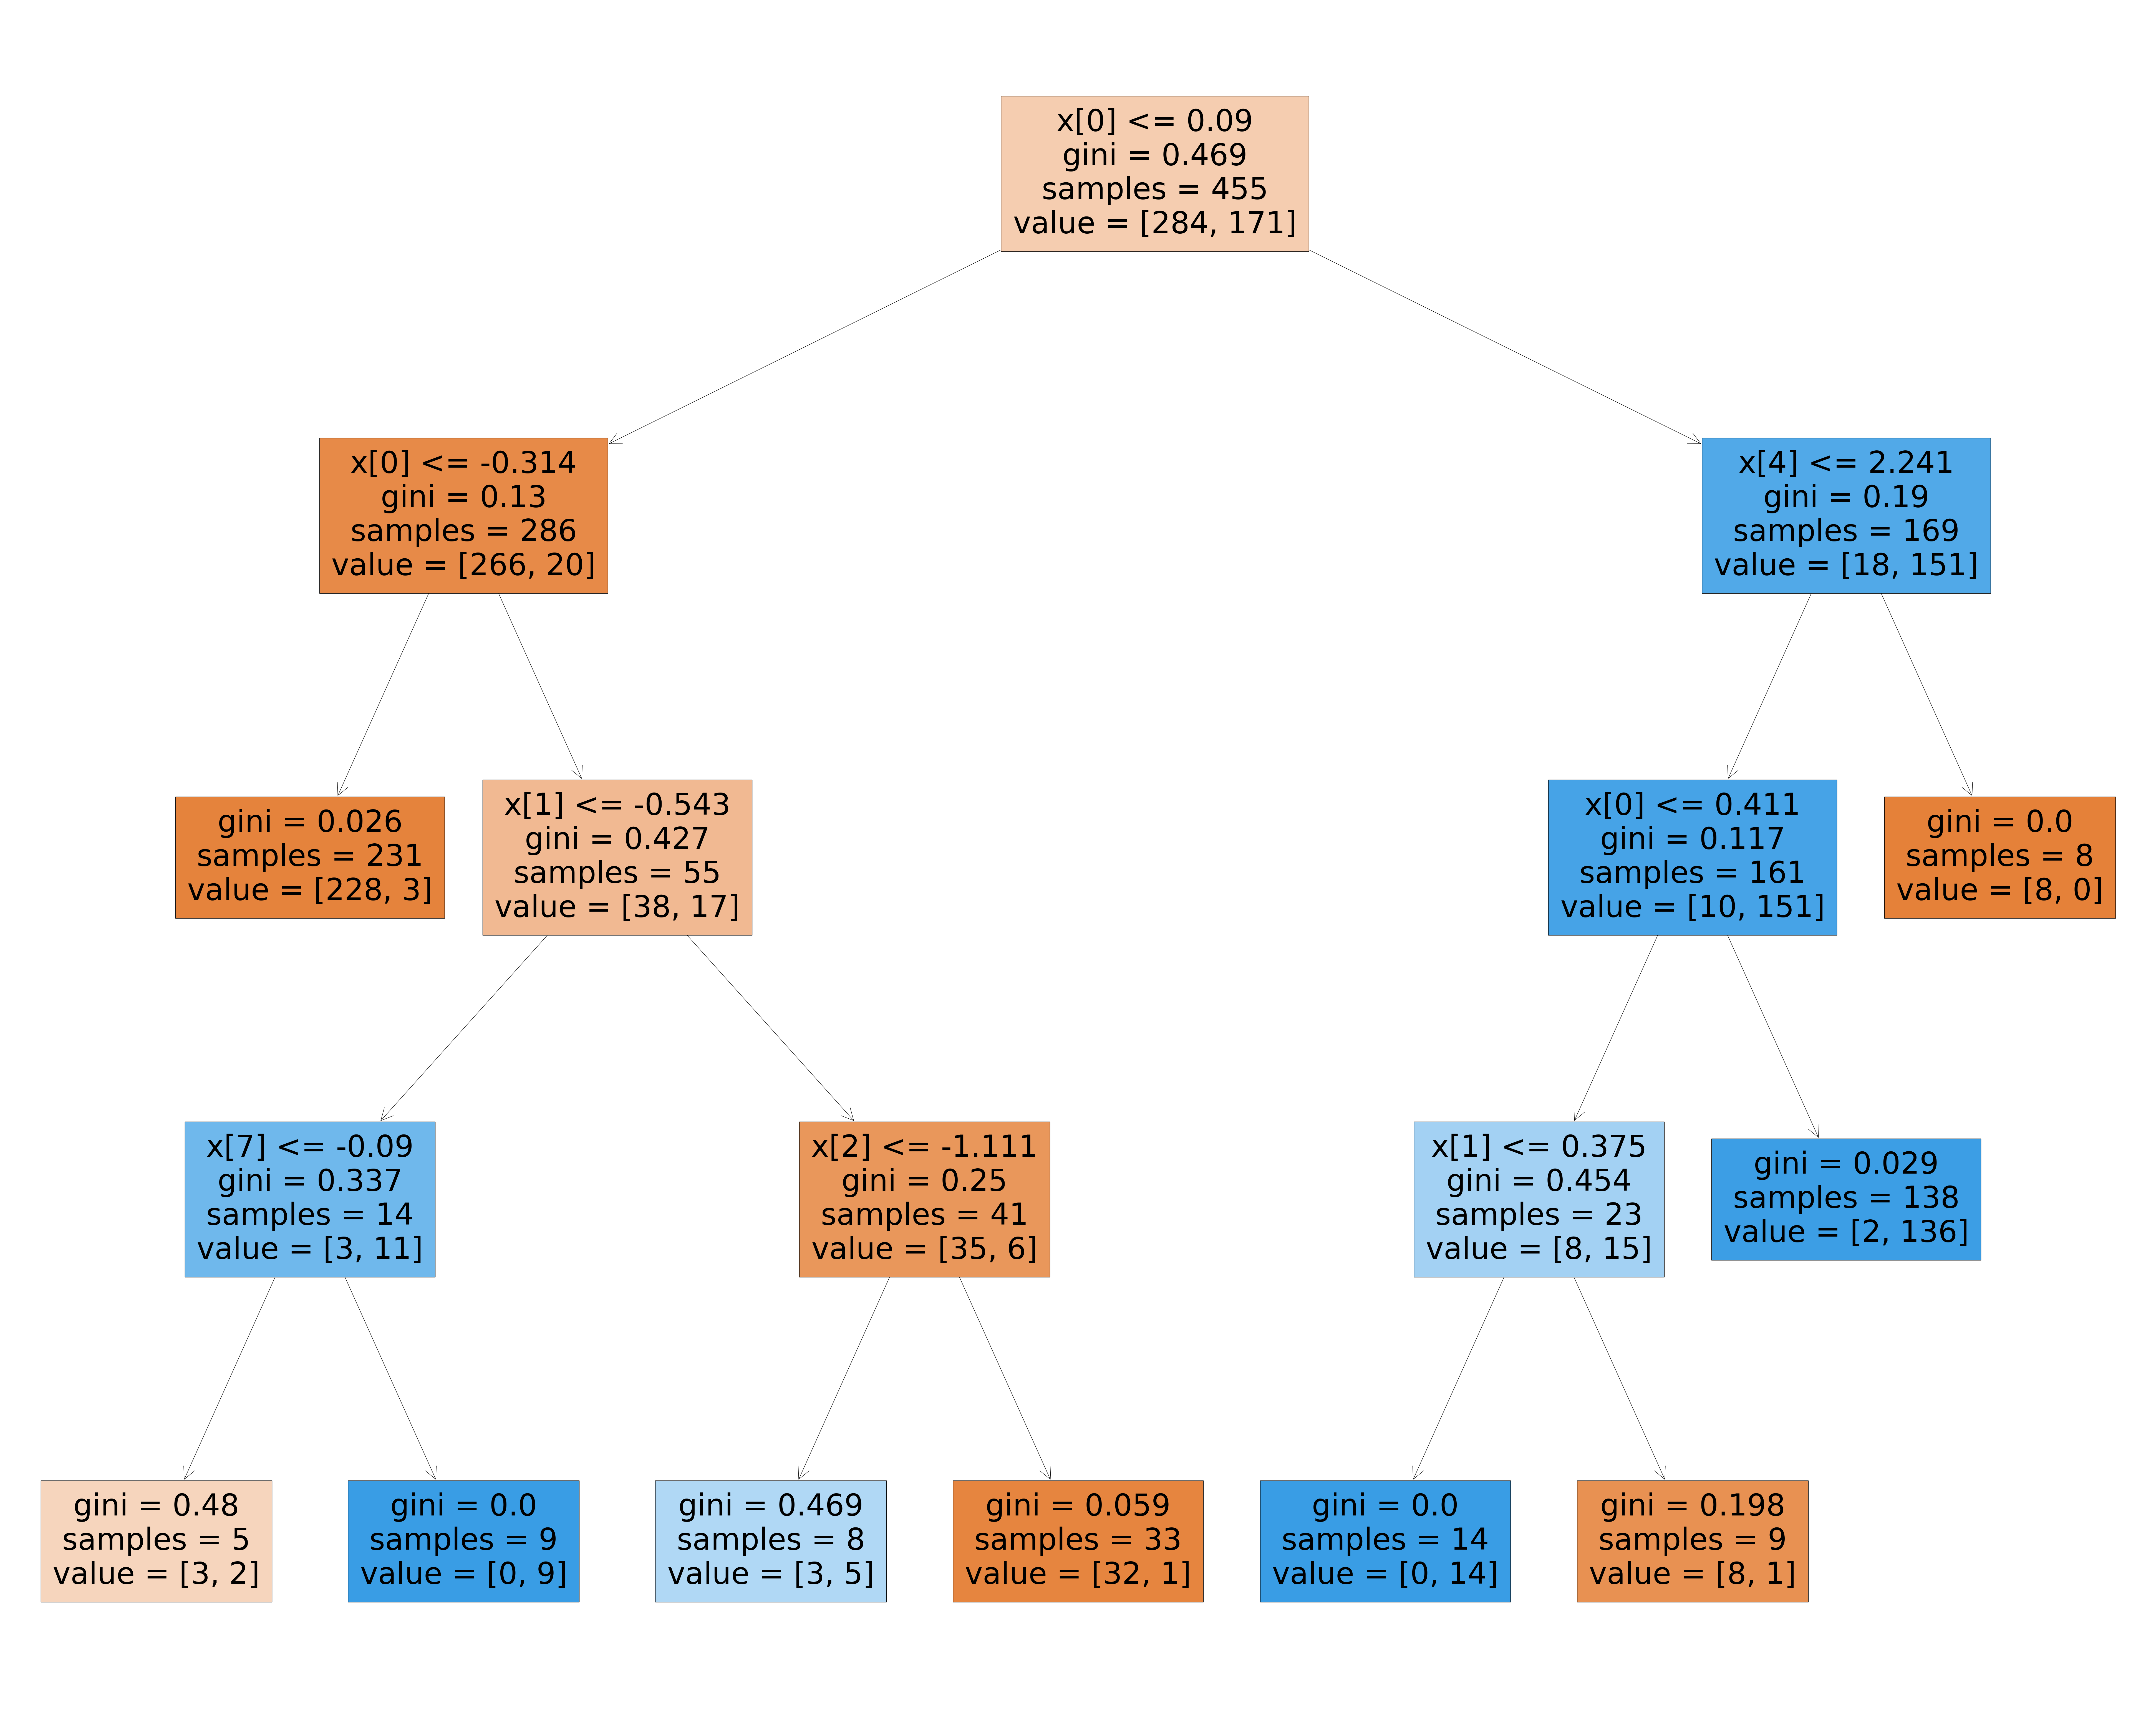

In [78]:
print("The best estimator after hyper parameter optimization is",gs_dt.best_estimator_)
plt.figure(figsize=(100, 80))
plot_tree(gs_dt.best_estimator_[1], label="all",filled=True)

In [79]:
print("Parameters for the best estimator are", gs_dt.best_params_)
print("Mean Accuracy of the best estimator is", gs_dt.best_score_)

Parameters for the best estimator are {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__max_leaf_nodes': 9, 'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_samples_split': 7}
Mean Accuracy of the best estimator is 0.9384615384615385


Number of test examples predicted to be benign and malignant respectively are:
B    75
M    39
Name: count, dtype: int64
Number of test examples which are  benign and malignant respectively :
target
B    73
M    41
Name: count, dtype: int64
Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors


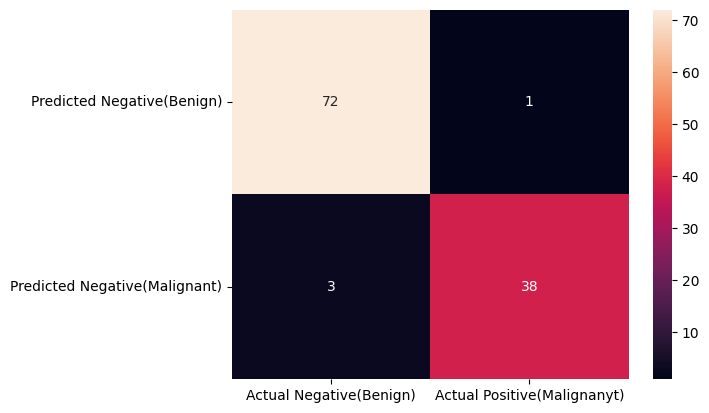

The accuracy of the model is: 0.9649122807017544
The precision of the model is: 0.9743589743589743
The recall of the model is: 0.926829268292683
The f1 score of the model is 0.9500000000000001


In [80]:
y_pred_dt=gs_dt.best_estimator_.predict(X_test)# predictions of best estimator

print(f"Number of test examples predicted to be benign and malignant respectively are:")
print(pd.Series(y_pred_dt).value_counts())
print(f"Number of test examples which are  benign and malignant respectively :")
print(pd.Series(y_test).value_counts())
cm_df_dt=pd.DataFrame(confusion_matrix(y_test, y_pred_dt),columns=['Actual Negative(Benign)','Actual Positive(Malignanyt)'],index=['Predicted Negative(Benign)','Predicted Negative(Malignant)']) # Creating a Data frame to represent the confusion matrix
heatmap_cm_dt=sns.heatmap(cm_df_dt,cbar=True,annot=True)#making heat map from confusion matrix
print("Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors")
plt.show()
print("The accuracy of the model is:" ,accuracy_score(y_test,y_pred_dt))
print("The precision of the model is:", precision_score(y_test,y_pred_dt,pos_label="M"))
print("The recall of the model is:", recall_score(y_test,y_pred_dt,pos_label="M"))
print("The f1 score of the model is", f1_score(y_test,y_pred_dt,pos_label="M"))


## 3) SVM classifier

In [81]:
from sklearn.svm import SVC


In [82]:
scaler=StandardScaler()
model_svm=SVC()
pipeline_svm=make_pipeline(scaler, model_svm)
param_grid_svm={
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma":[0.0001, 0.001, 0.01, 0.1],
    "svc__kernel":["linear","poly","rbf","sigmoid"]
}

In [83]:
gs_svm = GridSearchCV(pipeline_svm, param_grid = param_grid_svm,cv=5,n_jobs=-1,return_train_score=True) #Training the model
gs_svm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True)

In [85]:
cv_results_svm_df=pd.DataFrame(gs_svm.cv_results_)
print(cv_results_svm_df.describe())

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
count      96.000000     96.000000        96.000000       96.000000   
mean        0.038594      0.012599         0.013891        0.005044   
std         0.021559      0.024737         0.005665        0.003243   
min         0.020594      0.000890         0.005256        0.000306   
25%         0.030036      0.003978         0.010399        0.002653   
50%         0.033922      0.006168         0.012323        0.004401   
75%         0.038876      0.010126         0.017413        0.006113   
max         0.146887      0.157510         0.032714        0.017521   

       split0_test_score  split1_test_score  split2_test_score  \
count          96.000000          96.000000          96.000000   
mean            0.772321           0.771978           0.770261   
std             0.168581           0.155971           0.157553   
min             0.615385           0.626374           0.626374   
25%             0.615385      

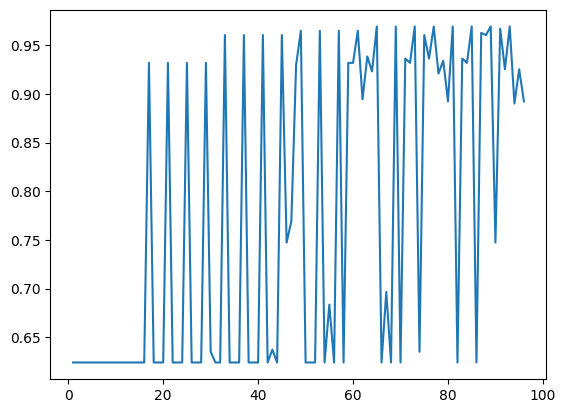

In [86]:
plt.plot(list(range(1,97)),cv_results_svm_df["mean_test_score"])

In [87]:
print("The best estimator after hyper parameter optimization is",gs_svm.best_estimator_)
print("Parameters for the best estimator are", gs_svm.best_params_)
print("Mean Accuracy of the best estimator is", gs_svm.best_score_)

The best estimator after hyper parameter optimization is Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.0001, kernel='linear'))])
Parameters for the best estimator are {'svc__C': 10, 'svc__gamma': 0.0001, 'svc__kernel': 'linear'}
Mean Accuracy of the best estimator is 0.9692307692307693


Number of test examples predicted to be benign and malignant respectively are:
B    74
M    40
Name: count, dtype: int64
Number of test examples which are  benign and malignant respectively :
target
B    73
M    41
Name: count, dtype: int64
Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors


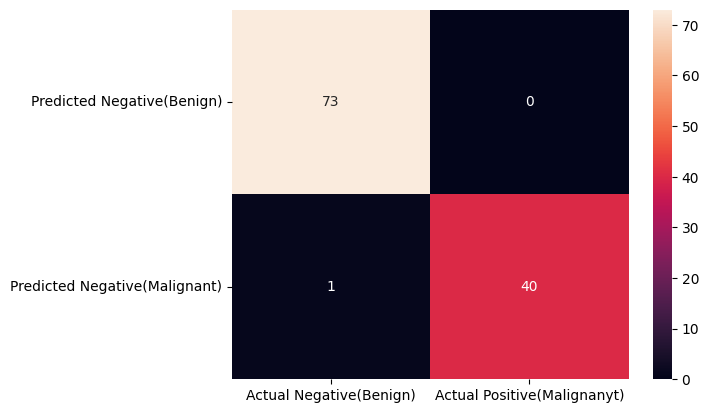

The accuracy of the model is: 0.9912280701754386
The precision of the model is: 1.0
The recall of the model is: 0.975609756097561
The f1 score of the model is 0.9876543209876543


In [88]:
y_pred_svm=gs_svm.best_estimator_.predict(X_test)# predictions of best estimator
print(f"Number of test examples predicted to be benign and malignant respectively are:")
print(pd.Series(y_pred_svm).value_counts())
print(f"Number of test examples which are  benign and malignant respectively :")
print(pd.Series(y_test).value_counts())
cm_df_svm=pd.DataFrame(confusion_matrix(y_test, y_pred_svm),columns=['Actual Negative(Benign)','Actual Positive(Malignanyt)'],index=['Predicted Negative(Benign)','Predicted Negative(Malignant)']) # Creating a Data frame to represent the confusion matrix
heatmap_cm_dt=sns.heatmap(cm_df_svm,cbar=True,annot=True)#making heat map from confusion matrix
print("Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors")
plt.show()
print("The accuracy of the model is:" ,accuracy_score(y_test,y_pred_svm))
print("The precision of the model is:", precision_score(y_test,y_pred_svm,pos_label="M"))
print("The recall of the model is:", recall_score(y_test,y_pred_svm,pos_label="M"))
print("The f1 score of the model is", f1_score(y_test,y_pred_svm,pos_label="M"))


## 4) KNN classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
scaler=StandardScaler()
model_knn=KNeighborsClassifier()
pipeline_knn=make_pipeline(scaler, model_knn)
param_grid_knn={
    "kneighborsclassifier__n_neighbors": list(range(5,10)),
    "kneighborsclassifier__p":[1,2],
    "kneighborsclassifier__weights":["uniform","distance"]
    
}
model_knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [91]:
gs_knn = GridSearchCV(pipeline_knn, param_grid = param_grid_knn,cv=5,n_jobs=-1,return_train_score=True) #Training the model
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [5, 6, 7, 8, 9],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             return_train_score=True)

In [92]:
cv_results_knn_df=pd.DataFrame(gs_knn.cv_results_)
print(cv_results_knn_df.describe())

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
count      20.000000     20.000000        20.000000       20.000000   
mean        0.018689      0.004077         0.027488        0.005189   
std         0.002130      0.001559         0.014053        0.004068   
min         0.014691      0.002061         0.010657        0.001355   
25%         0.017153      0.002987         0.014069        0.002741   
50%         0.018220      0.003887         0.027000        0.004008   
75%         0.020090      0.005126         0.039104        0.005531   
max         0.022391      0.007840         0.048216        0.018835   

       split0_test_score  split1_test_score  split2_test_score  \
count          20.000000          20.000000          20.000000   
mean            0.928571           0.875824           0.820879   
std             0.014482           0.010755           0.023943   
min             0.901099           0.857143           0.780220   
25%             0.923077      

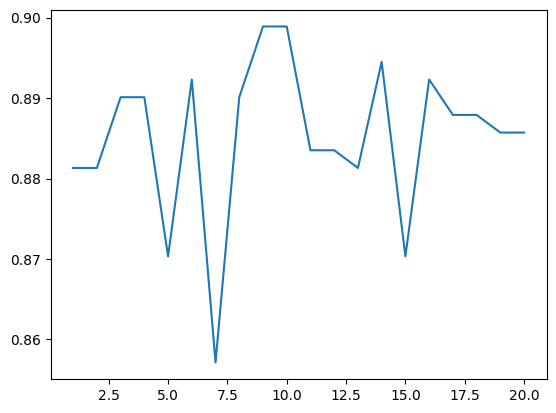

In [93]:
plt.plot(list(range(1,21)),cv_results_knn_df["mean_test_score"])

In [94]:
print("The best estimator after hyper parameter optimization is",gs_knn.best_estimator_)
print("Parameters for the best estimator are", gs_knn.best_params_)
print("Mean Accuracy of the best estimator is", gs_knn.best_score_)

The best estimator after hyper parameter optimization is Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=7, p=1))])
Parameters for the best estimator are {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Mean Accuracy of the best estimator is 0.8989010989010989


Number of test examples predicted to be benign and malignant respectively are:
B    84
M    30
Name: count, dtype: int64
Number of test examples which are  benign and malignant respectively :
target
B    73
M    41
Name: count, dtype: int64
Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors


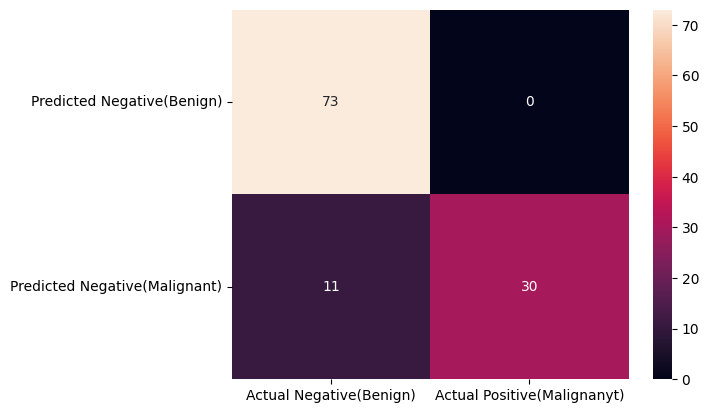

The accuracy of the model is: 0.9035087719298246
The precision of the model is: 1.0
The recall of the model is: 0.7317073170731707
The f1 score of the model is 0.8450704225352113


In [95]:
y_pred_knn=gs_knn.best_estimator_.predict(X_test)# predictions of best estimator
print(f"Number of test examples predicted to be benign and malignant respectively are:")
print(pd.Series(y_pred_knn).value_counts())
print(f"Number of test examples which are  benign and malignant respectively :")
print(pd.Series(y_test).value_counts())
cm_df_knn=pd.DataFrame(confusion_matrix(y_test, y_pred_knn),columns=['Actual Negative(Benign)','Actual Positive(Malignanyt)'],index=['Predicted Negative(Benign)','Predicted Negative(Malignant)']) # Creating a Data frame to represent the confusion matrix
heatmap_cm_dt=sns.heatmap(cm_df_knn,cbar=True,annot=True)#making heat map from confusion matrix
print("Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors")
plt.show()
print("The accuracy of the model is:" ,accuracy_score(y_test,y_pred_knn))
print("The precision of the model is:", precision_score(y_test,y_pred_knn,pos_label="M"))
print("The recall of the model is:", recall_score(y_test,y_pred_knn,pos_label="M"))
print("The f1 score of the model is", f1_score(y_test,y_pred_knn,pos_label="M"))

## 5) Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
scaler=StandardScaler()
model_lr=LogisticRegression()
pipeline_lr=make_pipeline(scaler, model_lr)
param_grid_lr={
    "logisticregression__solver": ['lbfgs', 'liblinear'],
    "logisticregression__C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}
print(model_lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [98]:
gs_lr = GridSearchCV(pipeline_lr, param_grid = param_grid_lr,cv=5,n_jobs=-1,return_train_score=True) #Training the model
gs_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1e-05, 0.0001, 0.001, 0.01,
                                                   0.1, 1, 10, 100],
                         'logisticregression__solver': ['lbfgs', 'liblinear']},
             return_train_score=True)

In [99]:
cv_results_lr_df=pd.DataFrame(gs_lr.cv_results_)
print(cv_results_lr_df.describe())
print("The best estimator after hyper parameter optimization is",gs_lr.best_estimator_)
print("Parameters for the best estimator are", gs_lr.best_params_)
print("Mean Accuracy of the best estimator is", gs_lr.best_score_)
#plot_tree(best_estimator_dt)

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
count      16.000000     16.000000        16.000000       16.000000   
mean        0.023412      0.005263         0.009654        0.003676   
std         0.006937      0.002871         0.002856        0.002069   
min         0.014725      0.001146         0.005204        0.000620   
25%         0.018226      0.003231         0.008355        0.002554   
50%         0.022197      0.005103         0.009412        0.003418   
75%         0.027402      0.006301         0.010647        0.003990   
max         0.037896      0.013560         0.015847        0.007661   

       split0_test_score  split1_test_score  split2_test_score  \
count          16.000000          16.000000          16.000000   
mean            0.903159           0.889423           0.896291   
std             0.143572           0.131652           0.138011   
min             0.615385           0.626374           0.626374   
25%             0.947802      

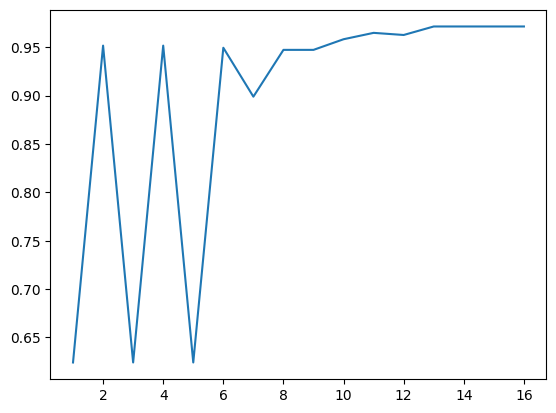

In [114]:
plt.plot(list(range(1,17)),cv_results_lr_df["mean_test_score"])
plt.show()

In [115]:
print("The best estimator after hyper parameter optimization is",gs_lr.best_estimator_)
print("Parameters for the best estimator are", gs_lr.best_params_)
print("Mean Accuracy of the best estimator is", gs_lr.best_score_)
#plot_tree(best_estimator_dt)

The best estimator after hyper parameter optimization is Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10))])
Parameters for the best estimator are {'logisticregression__C': 10, 'logisticregression__solver': 'lbfgs'}
Mean Accuracy of the best estimator is 0.9714285714285715


Number of test examples predicted to be benign and malignant respectively are:
B    74
M    40
Name: count, dtype: int64
Number of test examples which are  benign and malignant respectively :
target
B    73
M    41
Name: count, dtype: int64
Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors


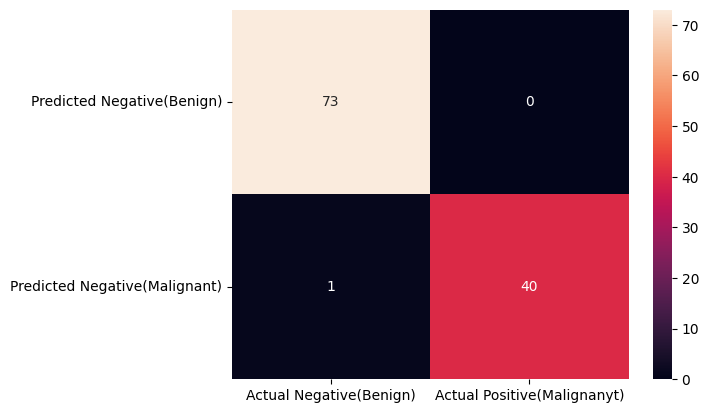

The accuracy of the model is: 0.9912280701754386
The precision of the model is: 1.0
The recall of the model is: 0.975609756097561
The f1 score of the model is 0.9876543209876543


In [102]:
y_pred_lr=gs_lr.best_estimator_.predict(X_test)# predictions of best estimator
print(f"Number of test examples predicted to be benign and malignant respectively are:")
print(pd.Series(y_pred_lr).value_counts())
print(f"Number of test examples which are  benign and malignant respectively :")
print(pd.Series(y_test).value_counts())
cm_df_lr=pd.DataFrame(confusion_matrix(y_test, y_pred_lr),columns=['Actual Negative(Benign)','Actual Positive(Malignanyt)'],index=['Predicted Negative(Benign)','Predicted Negative(Malignant)']) # Creating a Data frame to represent the confusion matrix
heatmap_cm_dt=sns.heatmap(cm_df_lr,cbar=True,annot=True)#making heat map from confusion matrix
print("Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors")
plt.show()
print("The accuracy of the model is:" ,accuracy_score(y_test,y_pred_lr))
print("The precision of the model is:", precision_score(y_test,y_pred_lr,pos_label="M"))
print("The recall of the model is:", recall_score(y_test,y_pred_lr,pos_label="M"))
print("The f1 score of the model is", f1_score(y_test,y_pred_lr,pos_label="M"))

## 6) Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [325]:
scaler=StandardScaler()
model_rf=RandomForestClassifier()
pipeline_rf=make_pipeline(scaler, model_rf)
param_grid_rf={
    "randomforestclassifier__max_depth": list(range(1,3)),
    "randomforestclassifier__n_estimators":list(range(20,100)),
    "randomforestclassifier__max_samples":list(range(2,15)),
}
print(model_rf.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [326]:
gs_rf = GridSearchCV(pipeline_rf, param_grid = param_grid_rf,cv=7,n_jobs=-2,return_train_score=True) #Training the model
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-2,
             param_grid={'randomforestclassifier__max_depth': [1, 2],
                         'randomforestclassifier__max_samples': [2, 3, 4, 5, 6,
                                                                 7, 8, 9, 10,
                                                                 11, 12, 13,
                                                                 14],
                         'randomforestclassifier__n_estimators': [20, 21, 22,
                                                                  23, 24, 25,
                                                                  26, 27, 28,
                                                                  29, 30, 31,
                                                                  32, 33, 34,
                                                                  35, 36, 37,
                                                                  38, 39, 40,
                                                                  41, 42, 43,
                                                                  44, 45, 46,
                                                                  47, 48, 49, ...]},
             return_train_score=True)

In [332]:
print(gs_rf.cv_results_.keys())
cv_results_rf=pd.DataFrame(gs_rf.cv_results_)
print(cv_results_rf.head(5))
print("________")
print(cv_results_rf.describe())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_randomforestclassifier__max_depth', 'param_randomforestclassifier__max_samples', 'param_randomforestclassifier__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'mean_train_score', 'std_train_score'])
[0.61318681 0.63736264 0.62857143 ... 0.87912088 0.88351648 0.88131868]
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.049710      0.001572         0.005009        0.000538   
1       0.048929      0.002495         0.005513        0.000269   
2       0.051268      0.002477         0.005465        0.000478   
3       0.051811      0.002349        

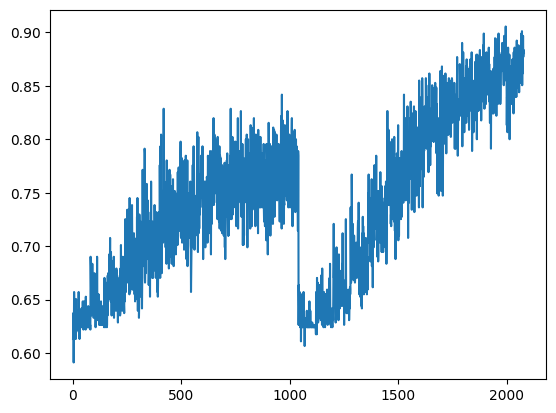

In [335]:
plt.plot(list(range(1,2081)),gs_rf.cv_results_["mean_test_score"])

In [349]:
print("The best estimator after hyper parameter optimization is",gs_rf.best_estimator_)
print("Parameters for the best estimator are", gs_rf.best_params_)
print("Mean Accuracy of the best estimator is", gs_rf.best_score_)

The best estimator after hyper parameter optimization is Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, max_samples=13,
                                        n_estimators=95))])
Parameters for the best estimator are {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_samples': 13, 'randomforestclassifier__n_estimators': 95}
Mean Accuracy of the best estimator is 0.9054945054945056


Number of test examples predicted to be benign and malignant respectively are:
B    90
M    24
Name: count, dtype: int64
Number of test examples which are  benign and malignant respectively :
target
B    73
M    41
Name: count, dtype: int64
Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors


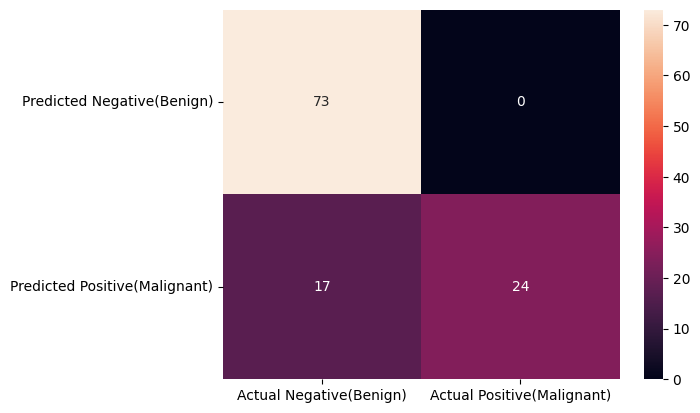

The accuracy of the model is: 0.8508771929824561
The precision of the model is: 1.0
The recall of the model is: 0.5853658536585366
The f1 score of the model is 0.7384615384615384


In [351]:
y_pred_rf=gs_rf.best_estimator_.predict(X_test)# predictions of best estimator
print(f"Number of test examples predicted to be benign and malignant respectively are:")
print(pd.Series(y_pred_rf).value_counts())
print(f"Number of test examples which are  benign and malignant respectively :")
print(pd.Series(y_test).value_counts())
cm_df_rf=pd.DataFrame(confusion_matrix(y_test, y_pred_rf),columns=['Actual Negative(Benign)','Actual Positive(Malignant)'],index=['Predicted Negative(Benign)','Predicted Positive(Malignant)']) # Creating a Data frame to represent the confusion matrix
heatmap_cm_dt=sns.heatmap(cm_df_rf,cbar=True,annot=True)#making heat map from confusion matrix
print("Here 'positive' refers to bening tumors and 'negatuve' refres to malignant tumors")
plt.show()
print("The accuracy of the model is:" ,accuracy_score(y_test,y_pred_rf))
print("The precision of the model is:", precision_score(y_test,y_pred_rf,pos_label="M"))
print("The recall of the model is:", recall_score(y_test,y_pred_rf,pos_label="M"))
print("The f1 score of the model is", f1_score(y_test,y_pred_rf,pos_label="M"))

## Ensembeles: Averaging

In [243]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,cross_validate

In [358]:
classifiers={'logistic regression': Pipeline(steps=[('scale', StandardScaler()),
                 ('lr',
                  LogisticRegression(class_weight='balanced', max_iter=1000))]),
 'decision tree': Pipeline(steps=[('scaler',StandardScaler()),('dt',DecisionTreeClassifier(max_depth=6,min_samples_leaf=5,min_samples_split=7))]),
 'knn' : Pipeline(steps=[('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=7,p=1))]),
'svm':Pipeline(steps=[('scaler',StandardScaler()),('svm',SVC(C=10, gamma=0.0001, kernel='linear',probability=True))]),
"random forest":Pipeline(steps=[('scaler',StandardScaler()),('random forest',RandomForestClassifier(max_depth=2, max_samples=13,n_estimators=95))])}


In [375]:
averaging_model = VotingClassifier(list(classifiers.items()), voting='hard')
map_function=lambda x: 1 if x == 'M' else 0 
y_train_encoded=np.array(list(map(map_function,y_train)))
y_test_encoded= np.array(list(map(map_function,y_test)))



In [382]:
averaging_model.fit(X_train, y_train_encoded)


VotingClassifier(estimators=[('logistic regression',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('lr',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=1000))])),
                             ('decision tree',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('dt',
                                               DecisionTreeClassifier(max_depth=6,
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=7))])),
                             ('knn',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=7,
                                                                    p=1))])),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm',
                                               SVC(C=10, gamma=0.0001,
                                                   kernel='linear',
                                                   probability=True))])),
                             ('random forest',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('random forest',
                                               RandomForestClassifier(max_depth=2,
                                                                      max_samples=13,
                                                                      n_estimators=95))]))])

In [383]:
mean_test_score_avg_model = cross_val_score(averaging_model, X_train, y_train_encoded, cv=5)
print("Mean test score post cross validation is:",max(mean_test_score_avg_model))

Mean test score post cross validation is: 0.967032967032967


Number of test examples predicted to be benign and malignant respectively are:
0    74
1    40
Name: count, dtype: int64
Number of test examples which are  benign and malignant respectively :
0    73
1    41
Name: count, dtype: int64
Here 'positive' refers to bening tumors and 'negative' refers to malignant tumors


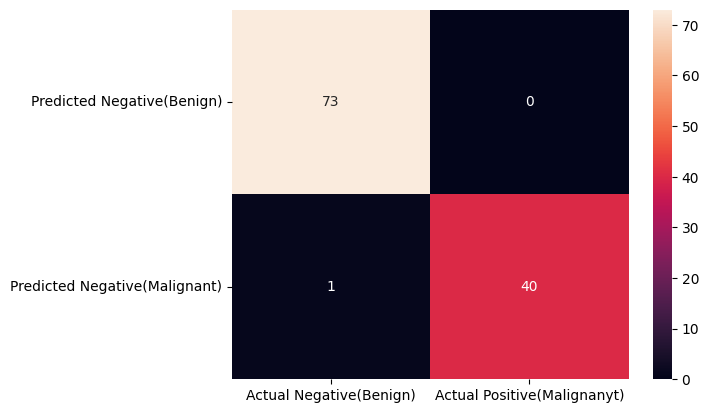

The accuracy of the model is: 0.9912280701754386
The precision of the model is: 1.0
The recall of the model is: 0.975609756097561
The f1 score of the model is 0.9876543209876543


In [385]:
y_pred_encoded_avg=averaging_model.predict(X_test)
print(f"Number of test examples predicted to be benign and malignant respectively are:")
print(pd.Series(y_pred_encoded_avg).value_counts())
print(f"Number of test examples which are  benign and malignant respectively :")
print(pd.Series(y_test_encoded).value_counts())
cm_df_avg=pd.DataFrame(confusion_matrix(y_test_encoded, y_pred_encoded_avg),columns=['Actual Negative(Benign)','Actual Positive(Malignanyt)'],index=['Predicted Negative(Benign)','Predicted Negative(Malignant)']) # Creating a Data frame to represent the confusion matrix
heatmap_cm_avg=sns.heatmap(cm_df_avg,cbar=True,annot=True)#making heat map from confusion matrix
print("Here 'positive' refers to bening tumors and 'negative' refers to malignant tumors")
plt.show()
print("The accuracy of the model is:" ,accuracy_score(y_test_encoded, y_pred_encoded_avg))
print("The precision of the model is:", precision_score(y_test_encoded, y_pred_encoded_avg,pos_label=1))
print("The recall of the model is:", recall_score(y_test_encoded, y_pred_encoded_avg,pos_label=1))
print("The f1 score of the model is", f1_score(y_test_encoded, y_pred_encoded_avg,pos_label=1))